In [1]:
%load_ext jupyter_black
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



# Aprendizaje no supervisado

 - En el aprendizaje no supervisado, a diferencia de el supervisado, no hay característica objetivo.
 - Lo que el modelo busca, son relaciones entre las observaciones. 

 ## Análisis de agrupaciones (clustering) 
 
 - El analisisi de agruoaciones, consiste en combinar observaciones similares en grupos o clústeres. 
 - La mayoría de los métodos de clustering determinan la distancia entre las observables para encontrar sus similitud o diferencia . 
 - Cuanto más cerca estén las observaciones entre sí, mas similares serán, y viceversa.

## K vecinos más cercanos (k-means) 

https://scikit-learn.org/stable/modules/clustering.html

K-vecinos, es un algoritmo de aprendizaje no-supervisado que se basado en el agrupamiento de observables que tienen características similares. 

Este método se aplica en el reconocimiento de patrones o como un punto de referencia para clasificadores más complejos como: las redes neuronales artificiales (ANN) y vectores de soporte (SVM)

1. Ventajas: 
    - No paramétrico, es decir que no hace suposiciones explícitas sobre la forma funcional de los datos, evitando modelar mal la distribución subyacente de los datos.

2. Desventajas: 
    - Consume muchos resursos, ya que segmenta las observaciones paso a paso, así que es un algoritmo iterativo.

El concepto clave de este algoritmo es el **centroide**, o el centro de un clúster. 
- El grado de cercanía a un centro en particular depende de a qué clúster pertenece la observación. 
- Cada clúster tiene su propio centroide, que se calcula la distancia entre las observaciones agrupadas.

### Funcionamiento del algoritmo:

1. Asigna al azar un número de clúster a cada observación, de 1 a **k**
2. Seleccionar los **k** elementos más *cercanos* (con menor distancia, según la función que se use)
3. Se calcula el centroide de cada clúster.
4. A cada observación se le asigna el número del centroide que está más cerca.
5. Calcular la distancia entre la clase a clasificar y el resto de las clases del conjunto de datos de entrenamiento.
6. El algoritmo repite un proceso interativo hasta que los clústeres de observación dejan de cambiar

### Cercanía:

Para hallar la *cercania* de una observable a otra se pueden usar distintos tipos de distancia como:

1. Distancia euclidiana

\begin{align*}
\sqrt{\sum_{i=1}^{k}(x_i - \mu_i)^2}
\end{align*}


2. Distancia manhattan

\begin{align*}
\sum_{i=1}^{k}|x_i - \mu_i|
\end{align*}

3. Distancia Minkowski

\begin{align*}
\sum_{i=1}^{k}\left(|x_i - \mu_i|\right)^q)^{1/q}
\end{align*}

donde $\mu$ es la posición del centroide

## Función objetivo

* Aprendizaje supervisado: la función de pérdida muestra la diferencia entre la predicción y la respuesta correcta. 

    - Tenemos que encontrar los parámetros del modelo con el valor más pequeño de la función de pérdida en el conjunto de entrenamiento.

* Aprendizaje no supervisado: cuando se conocen las respuestas correctas, se necesita una función objetivo para evaluar la calidad del modelo, esta función es un caso especial de una función objetivo. 

    - Tenemos que encontrar su valor mínimo con el conjunto de entrenamiento disponible.

## K vecinos

* La distancia entre las observaciones dentro de un clúster (distancia intraclúster) sea mínima. 
* La función objetivo del algoritmo es la suma de distancias intraclúster. 

El centroide para N observaciones es el centroide de clúster $\mu$, esto significa que el centroide de cada clúster $μ_k$ se calcula como el promedio para todas las observaciones en el clúster:

$$
\mu = \frac{1}{|C_k|}\sum_{x^j\epsilon C_k} x^j=\frac{1}{|C_k|}\left(\sum_{x^j\epsilon C_k}x_1^j,\sum_{x^j\epsilon C_k}x_2^j,...,\sum_{x^j\epsilon C_k}x_n^j\right)
$$

* $|C_k|$ es el número de puntos del clúster.
* x define las observaciones (en este caso, vectores de tamaño n).

Con el fin de encontrar el centroide más cercano para cada observación y asignarle un número de clúster, se calcula la distancia $d_2$ (distorsión o inercia) desde la observación hasta el centroide de cada clúster. Luego se selecciona la diferencia más pequeña.

$$
min_k d_2(\mu_k, x) = min_k \sqrt(\sum_{i=1}^{n}(\mu_i^k - x_i)^2)
$$

El valor de $k$ en el cual se alcanza el mínimo será el número del clúster más cercano.

Cuando se le asigna a la observación dicho número $C_k$, puedes seguir con el cálculo de distancias intraclúster, que la distancias desde cada observación en el clúster $C_k$ hasta el centroide $μ_k$:

$$
D_k = \sum_{x^j\epsilon C_k} (d_2(\mu_k, x^j))^2
$$

Inicialmente, los números de clúster se asignan a las observaciones de forma aleatoria, además de que hay una desviación intraclúster significativa (o sea que todos los puntos están dispersos y prácticamente no hay clústeres). Al final del algoritmo, se combinan todas las observaciones con el mismo número de clúster y los límites entre clústeres se vuelven visibles.

La función objetivo final del algoritmo se calcula como la suma de las desviaciones intraclúster:

$$
SD = \sum_{k} D_k = \sum_k\sum_{x^j\epsilon C_k} (d_2(\mu_k, x^j))^2
$$

In [2]:
data = pd.read_csv("./datasets/segments.csv")
data

,timespent,purchase,months
0,9.749627,26.984142,14.0
1,30.416766,5.916530,15.0
2,8.809746,35.502827,14.0
3,31.418008,9.820529,18.0
4,48.279014,18.359423,2.0
...,...,...,...
495,30.498767,13.154907,15.0
496,7.192033,27.348396,9.0
497,20.174739,98.147402,29.0
498,56.226202,22.613374,1.0


In [3]:
# Definir centroides iniciales
centers = np.array([[20, 80, 8], [50, 20, 5], [20, 30, 10]])

# Asegurarse de que los centroides iniciales son los correctos
model = KMeans(n_clusters=3, init=centers, random_state=12345)
model.fit(data)

KMeans(init=array([[20, 80,  8],
       [50, 20,  5],
       [20, 30, 10]]),
       n_clusters=3, random_state=12345)

In [4]:
# Crear un DataFrame con los centroides iniciales
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
centroids_init = pd.DataFrame(centers, columns=data.columns)
centroids_init["label"] = 3

In [5]:
# Asignar etiquetas a los datos
data["label"] = model.labels_.astype(str)
centroids["label"] = ["0 centroid", "1 centroid", "2 centroid"]

In [6]:
# Concatenar los datos y los centroides
data_all = pd.concat([data, centroids], ignore_index=True)

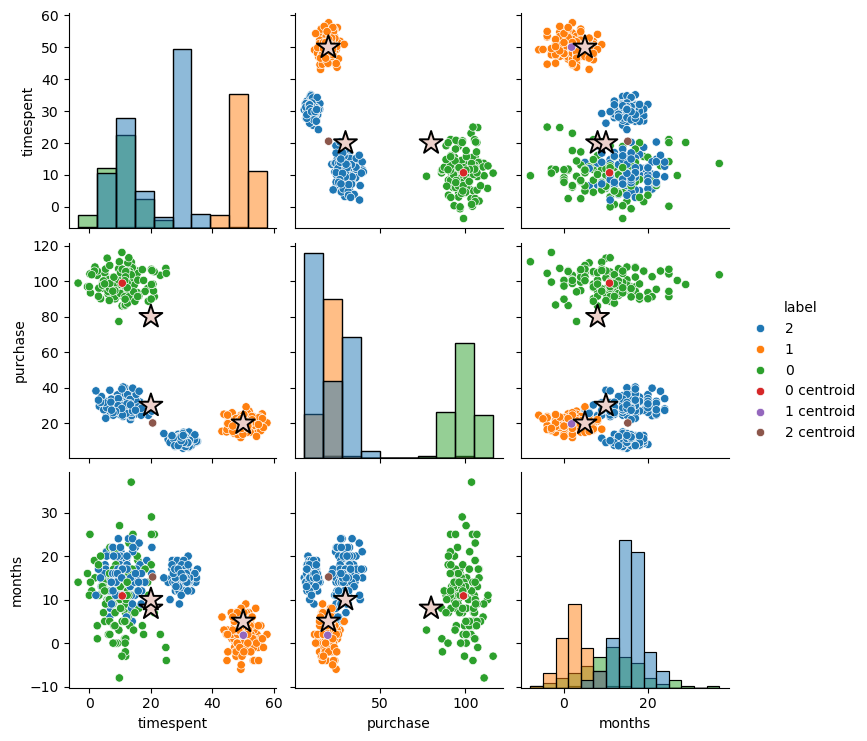

In [7]:
# Visualizar los datos y los centroides
pairgrid = sns.pairplot(data_all, hue="label", diag_kind="hist")
pairgrid.data = centroids_init
pairgrid.map_offdiag(func=sns.scatterplot, s=300, marker="*", edgecolor="black")

* El parámetro `n_init` está en 10 de forma predeterminada. Así, el algoritmo se lanza 10 veces con diferentes clústeres iniciales. 

# Número óptimo de clústeres: método de codo

Para trazar un gráfico mediante este método, necesitarás hacer una lista de los valores de la función objetivo de 1 a 10 clústeres (menos de 20). Con esto en mente, vamos a entrenar al modelo varias veces y guardar los valores de la función objetivo para cada modelo:


Número de clústeres: 1
Distorsión: 7.83e+05
Número de clústeres: 2
Distorsión: 1.62e+05
Número de clústeres: 3
Distorsión: 6.85e+04
Número de clústeres: 4
Distorsión: 2.71e+04
Número de clústeres: 5
Distorsión: 2.25e+04
Número de clústeres: 6
Distorsión: 2.00e+04
Número de clústeres: 7
Distorsión: 1.83e+04
Número de clústeres: 8
Distorsión: 1.66e+04
Número de clústeres: 9
Distorsión: 1.57e+04
Número de clústeres: 10
Distorsión: 1.48e+04


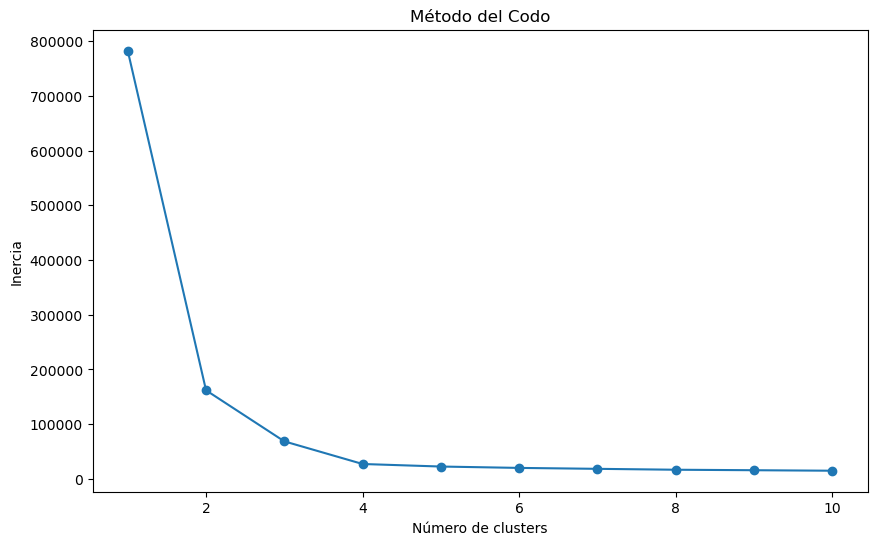

El número óptimo de clusters es: 3


In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0
    )
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    print("Número de clústeres:", i)
    model.inertia_ = "{:.2e}".format(kmeans.inertia_)
    print("Distorsión:", model.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Método del Codo")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.show()

# Paso 2: Crear la línea desde el primer al último punto
p1 = np.array([1, wcss[0]])
p2 = np.array([10, wcss[-1]])

# Paso 3: Calcular las distancias de cada punto a esta línea
distances = []
for i in range(len(wcss)):
    p = np.array([i + 1, wcss[i]])
    distance = np.abs(np.cross(p2 - p1, p1 - p)) / np.linalg.norm(p2 - p1)
    distances.append(distance)


# Paso 4: El punto con la distancia máxima es el "codo"
n_clusters_optimo = distances.index(max(distances)) + 1

print(f"El número óptimo de clusters es: {n_clusters_optimo}")

1. Al principio, el valor de la función objetivo disminuye abruptamente
2. Se regulariza en una meseta. Este momento de transición representa el número óptimo de clústeres.


Segmentos de usuarios típicos para 3 clústeres:
   timespent  purchase  months     label
0      20.57     20.15   15.20  centroid
1      10.69     98.90   10.86  centroid
2      50.06     19.63    1.81  centroid


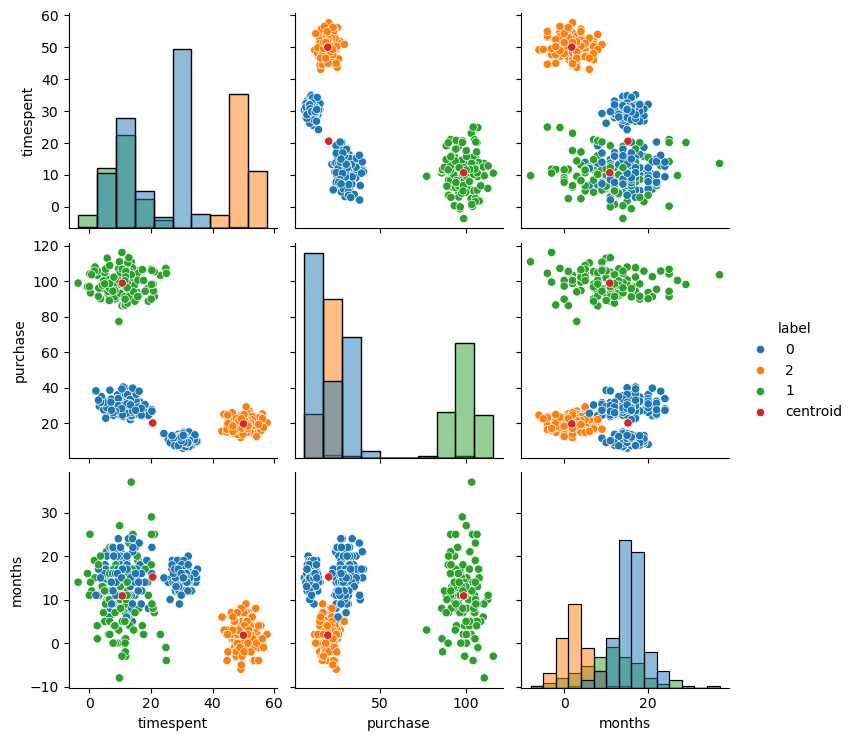

In [9]:
model = KMeans(n_clusters=n_clusters_optimo, random_state=12345)
model.fit(data)
centroids = pd.DataFrame(np.round(model.cluster_centers_, 2), columns=data.columns)
data["label"] = model.labels_.astype(str)
centroids["label"] = n_clusters_optimo * ["centroid"]
data_all = pd.concat([data, centroids], ignore_index=True)

sns.pairplot(data_all, hue="label", diag_kind="hist")

print("Segmentos de usuarios típicos para", n_clusters_optimo, "clústeres:")
print(centroids)

In [10]:
observ_knn = (100 * data_all.groupby("label").size() / data_all.shape[0]).round(2)
print("Observaciones por clúster:")
print(observ_knn)

Observaciones por clúster:
label
0           49.70
1           24.85
2           24.85
centroid     0.60
dtype: float64


/home/isadoji/Storage/Software/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


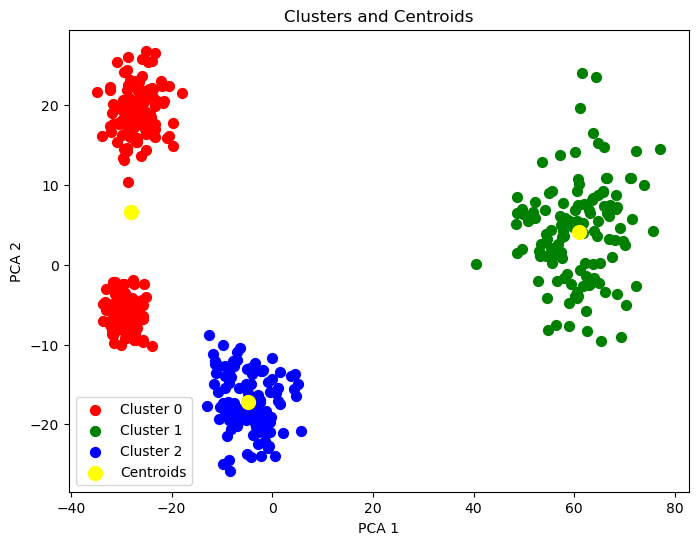

,timespent,purchase,months,label,cluster
0,9.749627,26.984142,14.0,0,2
1,30.416766,5.916530,15.0,0,0
2,8.809746,35.502827,14.0,0,2
3,31.418008,9.820529,18.0,0,0
4,48.279014,18.359423,2.0,2,0
...,...,...,...,...,...
495,30.498767,13.154907,15.0,0,0
496,7.192033,27.348396,9.0,0,2
497,20.174739,98.147402,29.0,1,1
498,56.226202,22.613374,1.0,2,0


In [11]:
kmeans = KMeans(n_clusters=n_clusters_optimo, random_state=42)
clusters = kmeans.fit_predict(data)

# D = 2
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(data)

plt.figure(figsize=(8, 6))
colors = ["red", "green", "blue", "cyan", "magenta"]
for i in range(np.unique(clusters).size):
    plt.scatter(
        X_reduced[clusters == i, 0],
        X_reduced[clusters == i, 1],
        s=50,
        c=colors[i],
        label=f"Cluster {i}",
    )
# Plot centroids
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c="yellow", label="Centroids")
plt.title("Clusters and Centroids")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

data["cluster"] = kmeans.fit_predict(data)
data

In [12]:
observ = (100 * data.groupby("cluster").size() / data.shape[0]).round(2)

print("Porcentaje de observaciones en cada cluster:")
print(observ)

Porcentaje de observaciones en cada cluster:
cluster
0    50.0
1    25.0
2    25.0
dtype: float64
